## GradientBoost - Regression

In [35]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [36]:
X,y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [38]:
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Sqaured Error: {mse:.2f}")

Mean Sqaured Error: 111.44


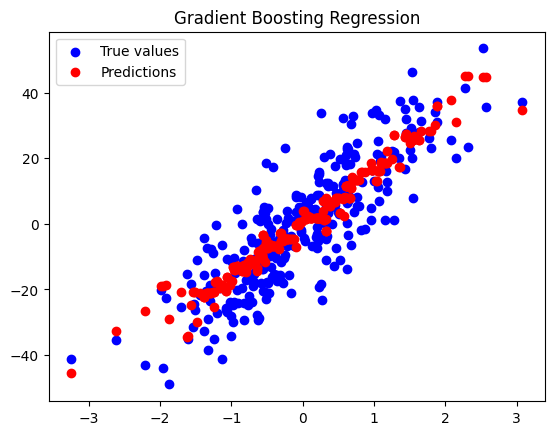

In [39]:
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.legend()
plt.title('Gradient Boosting Regression')
plt.show()

## Manually

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [41]:
X,y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X = X.flatten()
X

array([-1.75873949e+00,  1.03184454e+00, -4.87606224e-01,  1.86454315e-01,
        7.25766624e-01,  9.72554450e-01,  6.45375950e-01,  6.81891490e-01,
       -1.43014138e+00,  1.06667469e+00,  1.55050049e+00, -1.55677235e-01,
       -2.69874935e-01, -2.30192116e+00, -1.86726519e+00, -7.44334291e-02,
        5.88317206e-01,  1.20650897e+00, -1.92360965e-01,  1.11957491e+00,
       -3.09546439e-01, -1.28030440e+00,  1.30714275e+00,  1.17944012e+00,
        8.65897875e-02,  4.73832921e-01,  4.29618219e-01,  4.89374561e-01,
       -1.40746377e+00, -5.03475654e-01, -5.52223044e-01, -8.22220396e-01,
        1.54993441e+00,  5.76556963e-01,  2.32049937e-01,  3.38496407e-01,
       -3.76347024e-02, -8.15810285e-01, -1.42474819e+00, -4.69175652e-01,
       -4.78748622e-01,  3.24166352e-01,  9.15402118e-01,  7.10959968e-01,
       -4.63417693e-01,  9.63376129e-01, -7.55382932e-01,  1.79455786e+00,
        5.77072127e-01, -9.07563662e-01, -4.40044487e-01, -4.59360900e-01,
        3.66598246e-01,  

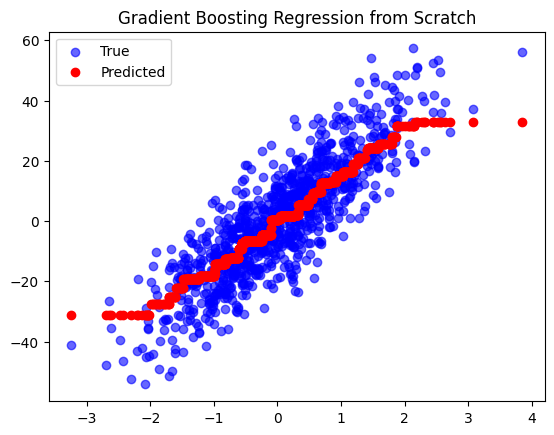

In [48]:
# decision stump as weak leaner : splits on one threhold, predicts mean in each region 
# this stump splits into two regions, left and right.
# each region predicts a constant value. 
class DecisionStumpRegressor:
    def __init__(self):
        self.threshold = None
        self.left_value = None
        self.right_value = None
    
    def fit(self, X, residuals):
        thresholds=np.unique(X) # assumes only 1 feature
        best_threshold = None
        best_error = float('inf')
        best_left_val = None
        best_right_val = None

        for t in thresholds:
            left_mask = X <= t
            right_mask = X > t

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_val = np.mean(residuals[left_mask])
            right_val = np.mean(residuals[right_mask])

            error = np.sum((residuals[left_mask] - left_val) ** 2) + np.sum((residuals[right_mask] - right_val) ** 2)

            if error < best_error:
                best_error = error
                best_threshold = t
                best_left_val = left_val
                best_right_val = right_val

            self.threshold = best_threshold
            self.left_value = best_left_val
            self.right_value = best_right_val

    def predict(self, X):
        return np.where(X <= self.threshold, self.left_value, self.right_value)

class GradientBoostingRegressorScratch:
    def __init__(self, n_estimators=10, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        # initializing prediction with mean of y
        F = np.full_like(y, fill_value=np.mean(y), dtype=float)
        # F stores the running ensemble predictiond
        # intial prediction is a flat line at the mean of the target values 

        for _ in range(self.n_estimators):
            residuals = y - F # Gradient for squared error is residuals
            tree = DecisionStumpRegressor()
            tree.fit(X, residuals)
            update = tree.predict(X)
            F += self.learning_rate * update
            self.trees.append(tree)

    def predict(self, X):
        F = np.full_like(X, fill_value=0, dtype=float)
        for tree in self.trees:
            F += self.learning_rate * tree.predict(X)
        return F
    
gbr = GradientBoostingRegressorScratch(n_estimators=50, learning_rate=0.1)
gbr.fit(X, y)

y_pred = gbr.predict(X)

# This Algorithm is only predicting using stumps (2 leaves) and not more 
# where practically, 8 to 32 leaves are used.

plt.scatter(X, y, label="True", color="blue", alpha=0.6)
plt.scatter(X, y_pred, label="Predicted", color="red")
plt.title("Gradient Boosting Regression from Scratch")
plt.legend()
plt.show()
